### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz

### About the Dataset

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/Network Dataset.csv")
df.head(10)

,dt,switch,sourceIP,destinationIP,packetCount,byteCount,duration,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Preprocessing

#### Dataset Dimensions

In [3]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 66733 rows and 21 columns


#### Concise summary of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66733 entries, 0 to 66732
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dt             66733 non-null  int64  
 1   switch         66733 non-null  int64  
 2   sourceIP       66733 non-null  object 
 3   destinationIP  66733 non-null  object 
 4   packetCount    66733 non-null  int64  
 5   byteCount      66733 non-null  int64  
 6   duration       66733 non-null  int64  
 7   flows          66733 non-null  int64  
 8   packetins      66733 non-null  int64  
 9   pktperflow     66733 non-null  int64  
 10  byteperflow    66733 non-null  int64  
 11  pktrate        66733 non-null  int64  
 12  Pairflow       66733 non-null  int64  
 13  Protocol       66733 non-null  object 
 14  port_no        66733 non-null  int64  
 15  tx_bytes       66733 non-null  int64  
 16  rx_bytes       66733 non-null  int64  
 17  tx_kbps        66733 non-null  int64  
 18  rx_kbp

#### Descriptive statistics of dataset

In [5]:
df.describe()

,dt,switch,packetCount,byteCount,duration,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,66733.000000,66733.000000,66733.000000,6.673300e+04,66733.000000,66733.000000,66733.000000,66733.000000,6.673300e+04,66733.000000,66733.000000,66733.000000,6.673300e+04,6.673300e+04,66733.000000,66227.000000,66227.000000,66733.000000
mean,17708.349093,3.971304,58930.099036,4.986355e+07,293.189921,5.093747,4448.276550,7239.286320,6.231668e+06,240.811757,0.496681,2.285391,8.780695e+07,8.782734e+07,1054.274407,1062.418364,2124.747837,0.444203
std,11365.981343,1.872230,50294.463269,5.073886e+07,263.836408,2.818288,4352.951091,7172.670348,7.736182e+06,239.110195,0.499993,1.046066,1.577416e+08,1.355242e+08,2561.948659,2156.460717,3258.092014,0.496881
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,4.000000,-129952.000000,-1.372656e+08,-4332.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,9906.000000,3.000000,5662.000000,1.319004e+06,114.000000,3.000000,1931.000000,30.000000,2.940000e+03,1.000000,0.000000,1.000000,3.972000e+03,3.185000e+03,0.000000,0.000000,0.000000,0.000000
50%,11665.000000,4.000000,53573.000000,3.330440e+07,230.000000,5.000000,2385.000000,8944.000000,7.465930e+06,298.000000,0.000000,2.000000,2.815900e+04,3.020561e+06,0.000000,0.000000,4.000000,0.000000
75%,29292.000000,5.000000,101974.000000,9.567036e+07,374.000000,6.000000,6024.000000,13388.000000,1.425029e+07,446.000000,1.000000,3.000000,1.354664e+08,1.413575e+08,228.000000,807.000000,3838.000000,1.000000
max,34623.000000,10.000000,260001.000000,1.471280e+08,1881.000000,17.000000,18351.000000,18890.000000,1.493182e+07,629.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### Drop rows with null values

In [6]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [7]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt               0
switch           0
sourceIP         0
destinationIP    0
packetCount      0
byteCount        0
duration         0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps         0
label            0
dtype: int64
This Dataframe has 66227 rows and 21 columns after removing null values


#### Distribution of Target Class

In [8]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 44.34 %
Number of DDOS attacks that has not occured : 55.66 %


#### Columns in the dataset

In [9]:
df.columns

Index(['dt', 'switch', 'sourceIP', 'destinationIP', 'packetCount', 'byteCount',
       'duration', 'flows', 'packetins', 'pktperflow', 'byteperflow',
       'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [10]:
print(df.apply(lambda col: col.unique()))

dt               [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sourceIP         [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
destinationIP    [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
packetCount      [45304, 126395, 90333, 103866, 85676, 32914, 4...
byteCount        [48294064, 134737070, 96294978, 110721156, 913...
duration         [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
flows                 [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17]
packetins        [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow       [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow      [14428310, 14424046, 14427244, 14426178, 14184...
pktrate          [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                    [0, 1]
Protocol                                          [UDP, TCP, ICMP]
port_no                                            [3, 4, 1, 2

#### Numerical Features

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 18 and they are : 
 ['dt', 'switch', 'packetCount', 'byteCount', 'duration', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['sourceIP', 'destinationIP', 'Protocol']


#### Number of Unique values in the numerical features 

In [13]:
df[numerical_features].nunique(axis=0)

dt              442
switch           10
packetCount    4819
byteCount      4879
duration        708
flows            13
packetins        90
pktperflow     1088
byteperflow    1334
pktrate         320
Pairflow          2
port_no           5
tx_bytes       6184
rx_bytes       5843
tx_kbps        1201
rx_kbps        1155
tot_kbps       1406
label             2
dtype: int64

#### Discrete numerical features

In [14]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [15]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


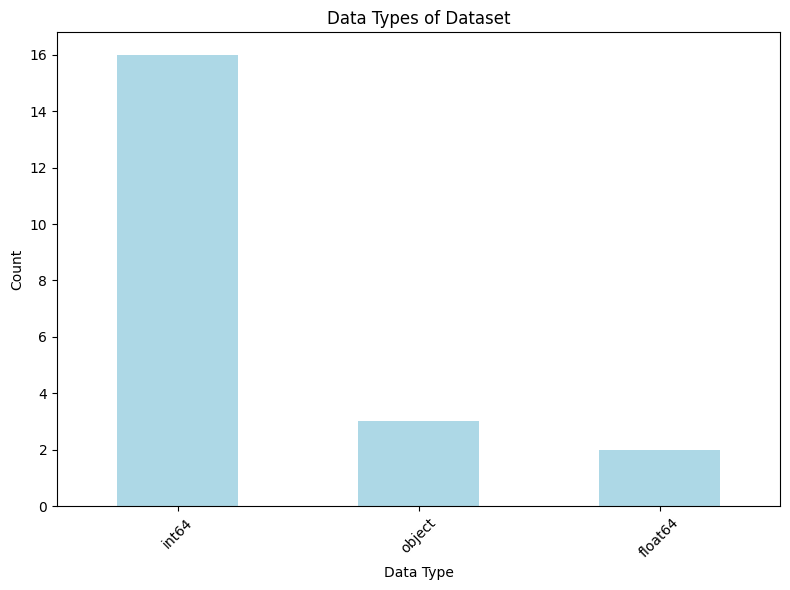

In [16]:
data = pd.read_csv("C:/Users/HP/Desktop/Network Dataset.csv")
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8,6))
data_types.plot(kind='bar', color='lightblue')
plt.title("Data Types of Dataset")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Continuous features

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 13 and they are : 
 ['dt', 'packetCount', 'byteCount', 'duration', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


In [18]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr
get_percentage_malign_protocols()

[58.641828151074485, 22.00047679051868, 19.357695058406836]

#### Distribution of protocols for malign attacks

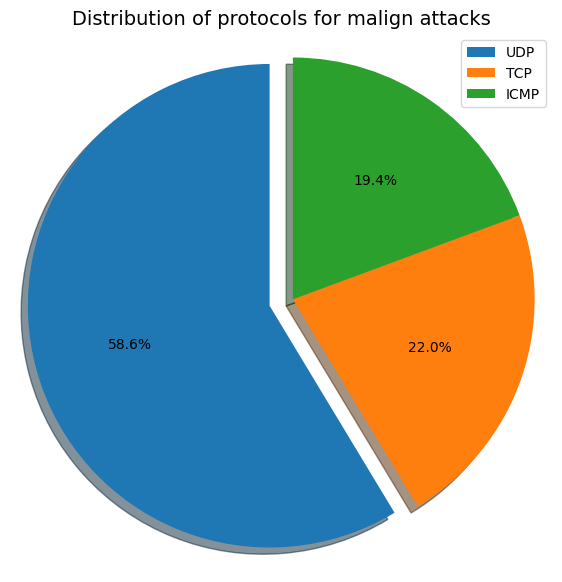

In [19]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

In [20]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['sourceIP', 'destinationIP', 'Protocol']


### Encoding categorical features

In [21]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 66227 rows and 54 columns after encoding


In [22]:
df.head(10)

,dt,switch,packetCount,byteCount,duration,flows,packetins,pktperflow,byteperflow,pktrate,...,destinationIP_10.0.0.2,destinationIP_10.0.0.3,destinationIP_10.0.0.4,destinationIP_10.0.0.5,destinationIP_10.0.0.6,destinationIP_10.0.0.7,destinationIP_10.0.0.8,destinationIP_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,2,1943,13531,14424046,451,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True


In [23]:
df.dtypes

dt                           int64
switch                       int64
packetCount                  int64
byteCount                    int64
duration                     int64
flows                        int64
packetins                    int64
pktperflow                   int64
byteperflow                  int64
pktrate                      int64
Pairflow                     int64
port_no                      int64
tx_bytes                     int64
rx_bytes                     int64
tx_kbps                      int64
rx_kbps                    float64
tot_kbps                   float64
label                        int64
sourceIP_10.0.0.10            bool
sourceIP_10.0.0.11            bool
sourceIP_10.0.0.12            bool
sourceIP_10.0.0.13            bool
sourceIP_10.0.0.14            bool
sourceIP_10.0.0.15            bool
sourceIP_10.0.0.16            bool
sourceIP_10.0.0.17            bool
sourceIP_10.0.0.18            bool
sourceIP_10.0.0.2             bool
sourceIP_10.0.0.20  

### Split into Independent and dependent variables

In [24]:
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [25]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(46358, 53) (19869, 53)


#### Models

In [27]:
Classifier_accuracy = []

#### SVM Classifier

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Classifier_accuracy = []

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="rbf",
        C=1.0,              
        gamma="scale",     
        random_state=42
    ))
])

svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_svm_pred)
Classifier_accuracy.append(accuracy * 100)

print("Accuracy of SVM Classifier : %.2f" % (accuracy * 100))

Accuracy of SVM Classifier : 99.41


In [33]:
report = classification_report( y_test, y_svm_pred, target_names=["Normal", "Malicious"])
print("Classification Report for SVM:\n", report)

Classification Report for SVM:
               precision    recall  f1-score   support

      Normal       0.99      1.00      0.99     11045
   Malicious       0.99      0.99      0.99      8824

    accuracy                           0.99     19869
   macro avg       0.99      0.99      0.99     19869
weighted avg       0.99      0.99      0.99     19869



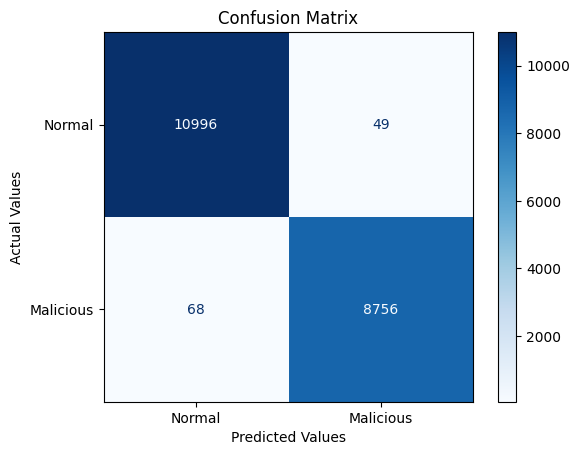

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_mtx = confusion_matrix(y_test, y_svm_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx,
    display_labels=["Normal", "Malicious"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=7,        
    weights="distance",   
    metric="minkowski",   
    p=2
)

knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_knn_pred)
Classifier_accuracy.append(accuracy * 100)

print("Accuracy of KNN Classifier : %.2f" % (accuracy * 100))

Accuracy of KNN Classifier : 98.18


In [36]:
report = classification_report( y_test, y_knn_pred, target_names=["Normal", "Malicious"])

print("Classification Report for KNN:\n", report)

Classification Report for KNN:
               precision    recall  f1-score   support

      Normal       0.98      0.99      0.98     11045
   Malicious       0.99      0.97      0.98      8824

    accuracy                           0.98     19869
   macro avg       0.98      0.98      0.98     19869
weighted avg       0.98      0.98      0.98     19869



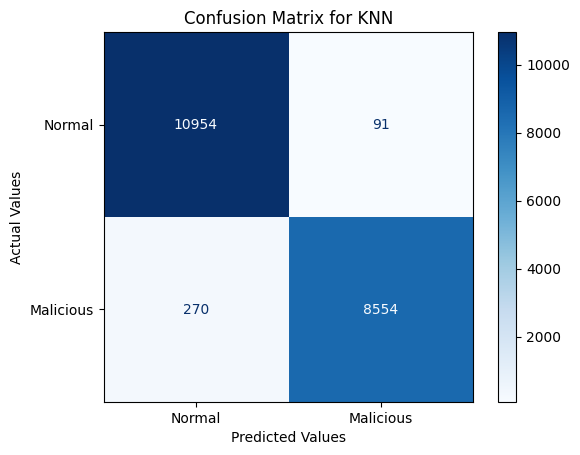

In [37]:
conf_matrix = confusion_matrix(y_test, y_knn_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=["Normal", "Malicious"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)

dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_dt_pred)
Classifier_accuracy.append(accuracy * 100)

print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy * 100))

Accuracy of Decision Tree Classifier : 96.44


In [39]:
report = classification_report(
    y_test,
    y_dt_pred,
    target_names=["Normal", "Malicious"]
)

print("Classification Report for DT:\n", report)

Classification Report for DT:
               precision    recall  f1-score   support

      Normal       0.99      0.95      0.97     11045
   Malicious       0.94      0.98      0.96      8824

    accuracy                           0.96     19869
   macro avg       0.96      0.97      0.96     19869
weighted avg       0.97      0.96      0.96     19869



## Plotting Confusion Matrix

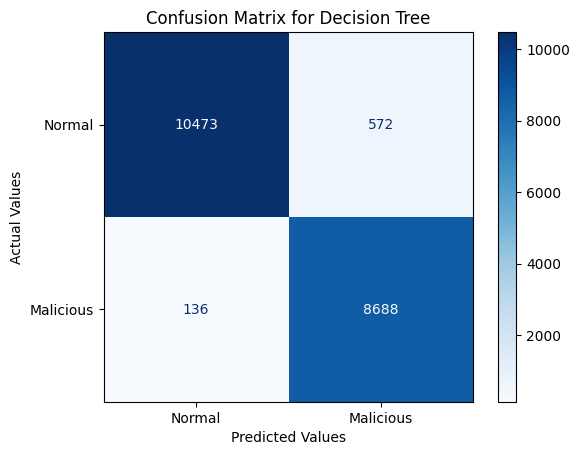

In [40]:
conf_mtx = confusion_matrix(y_test, y_dt_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx,
    display_labels=["Normal", "Malicious"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()